In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from templates import *

In [25]:
device = 'cuda:0'
conf = tyre_autoenc()
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/tyre_autoenc/last.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to(device);

Global seed set to 0


Model params: 141.74 M


In [44]:
data = ImageDataset('imgs', image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
batch1 = data[0]['img'][None]
batch2 = data[4]['img'][None]

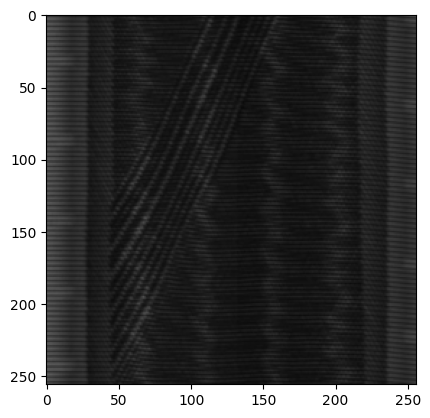

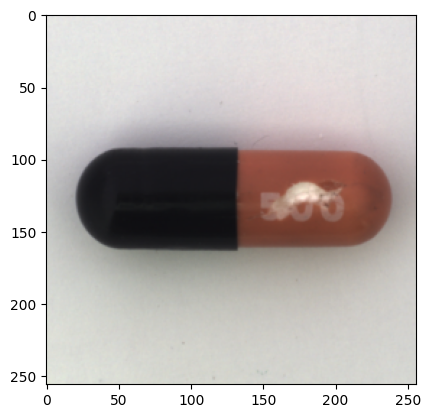

In [45]:
import matplotlib.pyplot as plt
plt.imshow(batch1[0].permute([1, 2, 0]) / 2 + 0.5)
plt.show()
plt.imshow(batch2[0].permute([1, 2, 0]) / 2 + 0.5)
plt.show()

# Encode

In [46]:
def get_similarity(cond1, cond2):
    if isinstance(cond1, torch.Tensor):
        cond1 = cond1.cpu().numpy()
        cond2 = cond2.cpu().numpy()
    cosine_similarities = np.dot(cond1, cond2.T)
    magnitude1 = np.linalg.norm(cond1, axis=1, keepdims=True)
    magnitude2 = np.linalg.norm(cond2, axis=1, keepdims=True)
    cosine_similarities /= np.dot(magnitude1, magnitude2.T)
    return cosine_similarities
cond1 = model.encode(batch1.to(device))
cond2 = model.encode(batch2.to(device))
print(get_similarity(cond1, cond2))
# cond = (torch.ones((1, 512)) * 15).to(device)
# print(cond)
xT = model.encode_stochastic(batch1.to(device), cond1, T=250)

[[0.9334964]]
ddim250


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


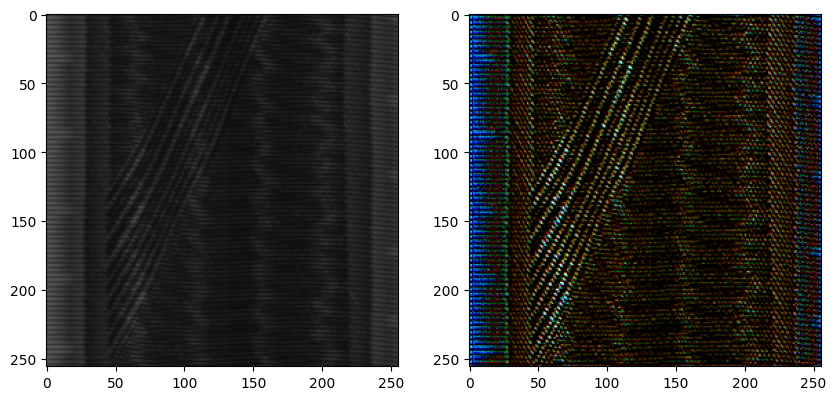

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch1 + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(xT[0].permute(1, 2, 0).cpu())

# Decode

ddim20


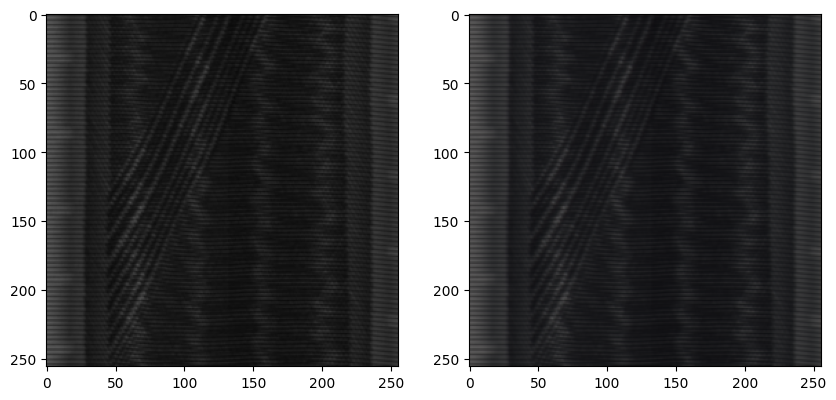

In [48]:
pred = model.render(xT, cond1, T=20)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ori = (batch1 + 1) / 2
ax[0].imshow(ori[0].permute(1, 2, 0).cpu())
ax[1].imshow(pred[0].permute(1, 2, 0).cpu())